1. (1 балл) Загрузите предложенный вам датасет с помощью функции `sklearn.datasets.fetch_openml`. Выведите текстовое описание загруженного датасета. Определите какая бизнес-задача ставится. Переведите бизнес-задачу в задачу машинного обучения.


In [16]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
dataset = fetch_openml('wine_quality')
print(dataset.DESCR)

**Author**: Tobias Kuehn  
**Source**: Unknown - 2009  
**Please cite**:   

1. Title: Wine Quality 

2. Sources
Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
    
3. Past Usage:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model these datasets under a regression approach. The support vector machine model achieved the best results. Several metrics were computed: MAD, confusion matrix for a fixed error tole

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name wine_quality exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Бизнес-задача: Необходимо по набору химических характеристик вина определить оценку его качества (от 0 до 10)    
Задача машинного обучения: Для решения данной бизнес-задачи будем использовать классификацию, т к оценка качества может быть целым числом в диапазоне (0 - 10)


2. (1 балл) Проведите предварительный анализ датасета.  Выведите основную статистическую информацию о данных. Проверьте дисбаланс целевого признака.

In [12]:
wine_data = pd.DataFrame(dataset.data, columns=dataset.feature_names) # Объединяем в датасет
wine_data['target'] = dataset.target

In [13]:
wine_data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [10]:
print(f'Количесвто строк: {np.array(dataset.data).shape[0]} \nКоличество признаков: {np.array(dataset.data).shape[1]}')

Количесвто строк: 6497 
Количество признаков: 11


In [15]:
wine_data.describe().round(3)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,target
count,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000,6497.000
mean,7.215,0.340,0.319,5.443,0.056,30.525,115.745,0.995,3.219,0.531,10.492,5.818
std,1.296,0.165,0.145,4.758,0.035,17.749,56.522,0.003,0.161,0.149,1.193,0.873
min,3.800,0.080,0.000,0.600,0.009,1.000,6.000,0.987,2.720,0.220,8.000,3.000
25%,6.400,0.230,0.250,1.800,0.038,17.000,77.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.290,0.310,3.000,0.047,29.000,118.000,0.995,3.210,0.510,10.300,6.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,156.000,0.997,3.320,0.600,11.300,6.000
max,15.900,1.580,1.660,65.800,0.611,289.000,440.000,1.039,4.010,2.000,14.900,9.000


In [28]:
X = wine_data.drop('target', axis=1)
y = wine_data.target

Text(0.5, 0.98, 'Распределение целевой переменной')

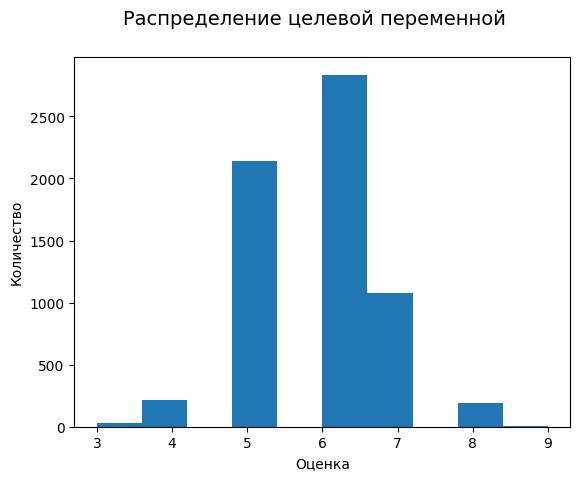

In [33]:
plt.hist(y)
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.suptitle('Распределение целевой переменной',fontsize=14)

Чаще всего качеству вина ставят оценку между 5 и 6 пунктами. Заметен дисбаланс целевого признака.

3. (1 балл) Убедитесь, что данные пригодны для моделирования. В данных не должно быть пропущенных значений, все признаки должны быть численными. Если эти условия нарушаются, исправьте это.

In [34]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  target                6497 non-null   float64
dtypes: float64(12)
memory usage: 609.2 KB


Датасет не содержит пропущенные значения, все признаки численного типа. Данные готовы для обучения модели

4. (1 балл) Обучите любую линейную модель, которая решает поставленную задачу. Выведите с помощью метода `score()` результат метрики оценки модели. Опишите какая метрика подсчитывается в методе `score()`.

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [43]:
log_model = LogisticRegression(multi_class='ovr')
log_model.fit(X_train, y_train)
print(f"Training score: {log_model.score(X_train, y_train):.4f}")
print(f"Test score: {log_model.score(X_test, y_test):.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score: 0.5365
Test score: 0.5208


Метод score() подсчитывает точность прогноза модели в сравнении с истинными значениями датасета.    
Точность предсказанных моделью значений очень низкая. Возможно, данный вид модели слишком простой для обучения на конкретном датасете.

5. (1 балл) К поставленной задачи машинного обучения подберите еще 3 метрики. С помощью их оцените обученную линейную модель.

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [49]:
y_test_pred = log_model.predict(X_test) # Предсказание
y_train_pred = log_model.predict(X_train)

metr_dict = {
    "precision_score": precision_score,
    "recall_score": recall_score,
    "f1_score": f1_score
}

for key, val in metr_dict.items():
    print(f"Метрика: {key}")
    print(f"Training score: {val(y_train, y_train_pred, average='macro'):.4f}")
    print(f"Test score: {val(y_test, y_test_pred, average='macro'):.4f}\n")

Метрика: precision_score
Training score: 0.2334
Test score: 0.3424

Метрика: recall_score
Training score: 0.2011
Test score: 0.2176

Метрика: f1_score
Training score: 0.1827
Test score: 0.2171



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Результаты работы данной модели по другим метрикам говорят о том, что модель работает совершенно неправильно. Точность положительно предсказанных классов, полнота и среднее между этими значениями очень малы.

6. (1 балл) Для задач классификации: Постройте для этой модели кривые ROC. Вычислите для этой модели метрики площади под кривыми ROC-AUC. Найдите оптимальное значения порога модели.

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

In [51]:
fpr_d = {}
tpr_d = {}
thrs_d = {}
roc_auc = {}
opt_thr_d = {}
y_pred_proba = log_model.predict_proba(X_test)
unique_class = set(y)

for i in range(len(unique_class)):
  fpr_d[i], tpr_d[i], thrs_d[i] = roc_curve(y_test == i, y_pred_proba[:, i])
  mean_geom = np.sqrt(tpr_d[i] * fpr_d[i])
  ix = np.argmax(mean_geom)
  opt_thr_d[i] = thrs_d[i][ix]
  roc_auc[i] = auc(fpr_d[i], tpr_d[i])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


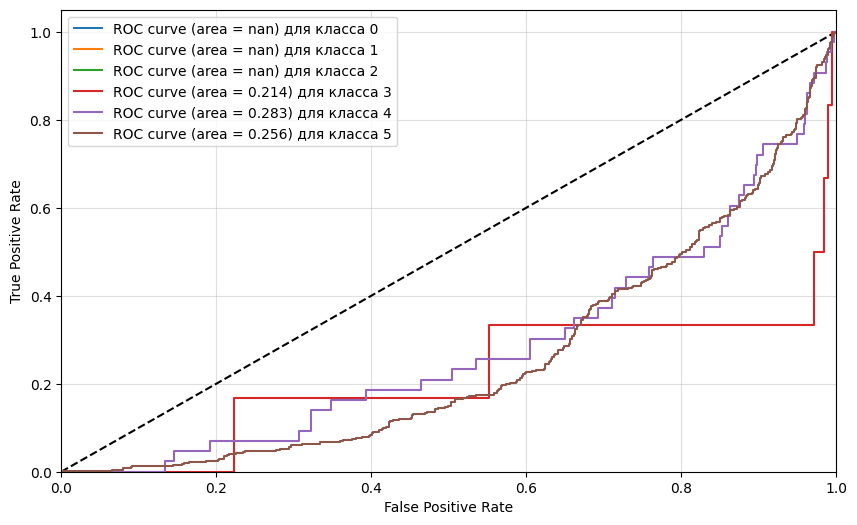

Оптимальные значения порога для каждого класса: {0: 1.2978703355355634, 1: 1.2490277965650236, 2: 1.7690339913804611, 3: 0.052063220833986734, 4: 0.0012170812891598172, 5: 0.0006227484907146122, 6: 5.591713025524824e-05}
Среднее оптимальное значение порога: 0.6242701558893092


In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('')
for i in range(6):
  ax.plot(fpr_d[i], tpr_d[i], label=f'ROC curve (area = {roc_auc[i].round(3)}) для класса {i}')
ax.legend(loc="best")
ax.grid(alpha=.4)
plt.show()
print(f'Оптимальные значения порога для каждого класса: {opt_thr_d}')
print(f'Среднее оптимальное значение порога: {sum(opt_thr_d.values())/len(opt_thr_d.values())}')

По метри ROC_AUC так же видно, что линейная модель совершенно не подходит для данной задачи. Прямые для каждого класса находятся ниже прямой "угадывания". Т е модель предсказывает классы наоборот.    
Оптимальное значение порога: 0.624

7. (1 балл) Для задач классификации: Постройте для этой модели кривые PR. Вычислите для этой модели метрики площади под кривыми PR-AUC. Найдите оптимальное значения порога модели.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
<ipython-input-54-51319c5cfbb8>:12: RuntimeWarning: invalid value encountered in divide
  f1 = (2 * precision[i] * recall[i]) / (precision[i] + recall[i])
<ipython-input-54-51319c5cfbb8>:12: RuntimeWarning: invalid value encountered in divide
  f1 = (2 * precision[i] * recall[i]) / (precision[i] + recall[i])
<ipython-input-54-51319c5cfbb8>:12: RuntimeWarning: invalid value encountered in divide
  f1 = (2 * precision[i] * recall[i]) / (precision[i] + recall[i]

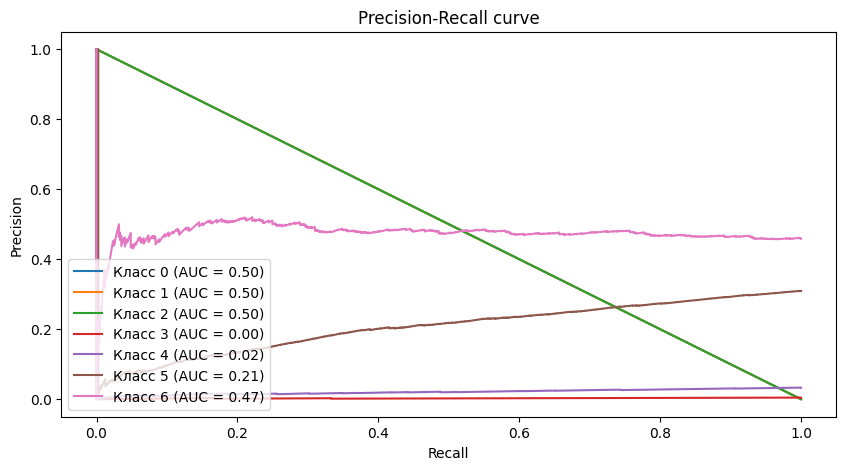

Оптимальные значения порога для каждого класса: {0: 0.00019443544541155884, 1: 2.1848872202406995e-09, 2: 0.005732077549014312, 3: 0.5175108217288563, 4: 0.32219087022197596, 5: 0.0006227484907146122, 6: 0.005796200891480813}
Среднее оптимальное значение порога: 0.12172102235890582


In [54]:
precision = {}
recall = {}
thr = {}
pr_auc = {}
opt_thr = {}

plt.figure(figsize=(10, 5))
for i in range(len(np.unique(y))):
    precision[i], recall[i], thr[i] = precision_recall_curve(y_test == i, y_pred_proba[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

    f1 = (2 * precision[i] * recall[i]) / (precision[i] + recall[i])
    ix = np.argmax(f1)
    opt_thr[i] = thr[i][ix]

    plt.plot(recall[i], precision[i], label=f'Класс {i} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

print(f'Оптимальные значения порога для каждого класса: {opt_thr}')
print(f'Среднее оптимальное значение порога: {sum(opt_thr.values())/len(opt_thr.values())}')

Метрики PR_AUC так же указывает на то, что данная модель не подходит для решения данной задачи.    
Оптимальное значение порога: 0.1217

8. (1 балл) Обоснуйте выбор типа разбиения данных при кросс-валидации для вашей задачи машинного обучения. Обучите любую другую модель используя кросс-валидацию данных.

In [69]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [70]:
k_model = KNeighborsClassifier()

In [74]:
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)

cv_results = cross_val_score(k_model, X, y, cv = skf, scoring = 'accuracy', n_jobs=-1)

print("Кросс-валидация: ", cv_results.round(3))
print("Среднее по кросс-валидации: ", cv_results.mean().round(3))
print("Дисперсия по кросс-валидации: ", cv_results.std().round(3))

Кросс-валидация:  [0.469 0.47  0.474]
Среднее по кросс-валидации:  0.471
Дисперсия по кросс-валидации:  0.003


Т к в целевом признаке заметен дизбаланс перменных, использовался тип разбиения StratifiedKFold

9. (2 балл) Проведите диагностику любой модели. Постройте кривые обучения. Сделайте вывод о переобученности или недообученности модели.

In [75]:
from yellowbrick.model_selection import LearningCurve

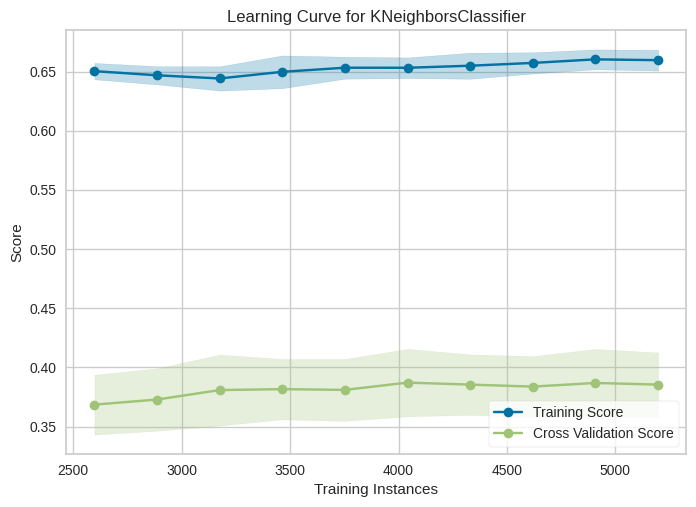

In [77]:
visualizer = LearningCurve(
    KNeighborsClassifier(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

На графике диагностики модели не было замечно недообучение.
Однако, можно предположить, что модель преобучилась, т к зазор между линиями тестовой и обучающей эффективности достаточно большой

10. (2 балл) Исследуйте как любой из гиперпараметров модели влияет на эффективность модели.

In [79]:
k_values = [2, 10, 50, 200]

for k in k_values:
  k_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
  y_pred_svc = k_model.predict(X_test)

  precision = precision_score(y_test, y_pred_svc, average='micro')
  recall = recall_score(y_test, y_pred_svc, average='micro')
  f1_micro = f1_score(y_test, y_pred_svc, average='micro')
  ac_score = accuracy_score(y_test, y_pred_svc)

  print(f'Значение гиперпараметра K = {k} \nPrecission: {precision.round(3)}')
  print(f'Recall: {recall.round(3)}')
  print(f'F1_score: {f1_micro.round(3)}')
  print(f'Accuracy_score: {ac_score}\n')

Значение гиперпараметра K = 2 
Precission: 0.486
Recall: 0.486
F1_score: 0.486
Accuracy_score: 0.48615384615384616

Значение гиперпараметра K = 10 
Precission: 0.462
Recall: 0.462
F1_score: 0.462
Accuracy_score: 0.46153846153846156

Значение гиперпараметра K = 50 
Precission: 0.469
Recall: 0.469
F1_score: 0.469
Accuracy_score: 0.46923076923076923

Значение гиперпараметра K = 200 
Precission: 0.449
Recall: 0.449
F1_score: 0.449
Accuracy_score: 0.4492307692307692



С увеличением параметра k, метрики увеличивались до определенного значения. Далее эффективность падала.